/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


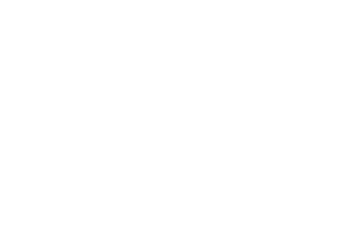

In [68]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 

def clear_folder():
  mydir = "cropped-faces/"
  filelist = [ f for f in os.listdir(mydir) if f.endswith(".jpg") ]
  for f in filelist:
    os.remove(os.path.join(mydir, f))



def detect_faces(image):
    face_detector = dlib.get_frontal_face_detector()

    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]
    return face_frames

df = pd.DataFrame(columns=['filename', 'faces'])
all_filename = []
all_faces = []

for filename in os.listdir("faces/"):
  counter = 0
  if filename.endswith(".jpg"):
    img_path = "faces/" + filename
    image = io.imread(img_path)
    detected_faces = detect_faces(image)

    all_filename.append(filename)
    all_faces.append(len(detected_faces))

    for n, face_rect in enumerate(detected_faces):
      face = Image.fromarray(image).crop(face_rect)
      plt.subplot(1, len(detected_faces), n+1)
      plt.axis('off')
      new_path = "cropped-faces/" + str(counter) + "-" + filename 
      counter += 1;  
      plt.savefig(new_path, dpi=300, bbox_inches='tight')

df['filename'] = all_filename
df['faces'] = all_faces

df.to_csv('all-data.csv')
